# EDA

### 초기세팅

In [24]:
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [25]:
# 데이터 불러오기
import pandas as pd

# 데이터 일별 주차대수 및 이용시간 현황
df = pd.read_csv("../Data/HanRiver_FeatureEngineering.csv", index_col=False)

In [26]:
df.drop(columns='Unnamed: 0', inplace=True)

In [27]:
df.columns

Index(['지구별', '주차장명', '주차대수', '이용시간', '날짜', '월', '일', '요일', '평균_주차시간(분)',
       '평균기온(°C)', '총_주차가능_대수', '일반이용자_합계_일별', '일반이용자_아침_일별', '일반이용자_낮_일별',
       '일반이용자_저녁_일별', '주차대수_조건별_평균_일별', '주차 가능 확률', '점유율_아침_이동평균',
       '점유율_낮_이동평균', '점유율_저녁_이동평균', '혼잡도_군집'],
      dtype='object')

### 명칭 정리

지구별 => 0: 강서 / 1: 난지 / 2: 망원 / 3: 이촌 / 4: 뚝섬 / 5: 광나루 / 6: 양화 / 7: 여의도 / 8: 반포 / 9: 잠원 / 10:잠실       
주차장 => 0: 강서 1주차장 / 1: 광나루1,2주차장 / 2: 광나루3주차장/ 3: 광나루4주차장 / 4: 난지1,2,3주차장 / 5: 뚝섬 1주차장 / 6: 뚝섬 2주차장 / 7: 뚝섬 3주차장 / 8: 뚝섬 4주차장 / 9: 망원 1주차장/ 10: 망원 2,3주차장      
        11: 반포 1주차장 / 12: 반포 2,3주차장 / 13: 양화 1주차장 / 14: 양화 2주차장 / 15: 양화: 3주차장 / 16: 여의도 1주차장 / 17: 여의도 2주차장/ 18: 여의도 3주차장/ 19:이촌 3,4주차장 / 
혼잡도_군집 => 0: 여유 / 1: 보통 / 2: 혼잡 / 3: 만차

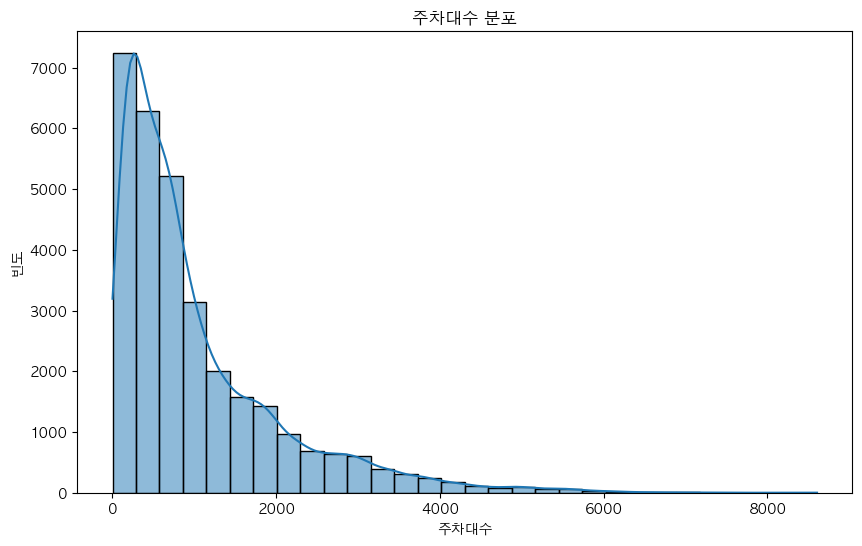

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 주차대수의 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['주차대수'], bins=30, kde=True)
plt.title('주차대수 분포')
plt.xlabel('주차대수')
plt.ylabel('빈도')
plt.show()

# 지구별 주차대수 평균 확인
geo_mean_parking = df.groupby('지구별')['주차대수'].mean()

# 주차장명별 주차대수 평균 확인
parking_lot_mean = df.groupby('주차장명')['주차대수'].mean()


주차대수 분포 분석:       
주차대수는 오른쪽으로 길게 늘어진 분포(Positive Skew)를 보입니다.           
대부분의 주차장은 낮은 주차대수를 기록하고, 일부는 매우 높은 주차대수를 보입니다.           
많은 데이터가 0에 가깝고, 특정 주차장만 높은 주차량을 기록합니다.               

이상치:         
주차대수가 8000 이상인 데이터는 이상치로 간주될 가능성이 높습니다.          
모델링 시 정확도 저하를 방지하기 위해 이상치 처리 필요.     

모델링 시 고려 사항:            
주차대수 분포가 왜곡되어 있으므로 로그 변환 등의 정규화를 고려해야 합니다.          
추가적으로 휴일/평일, 특정 시간대, 지구별 차이에 따른 주차대수 변화를 분석해야 합니다.          

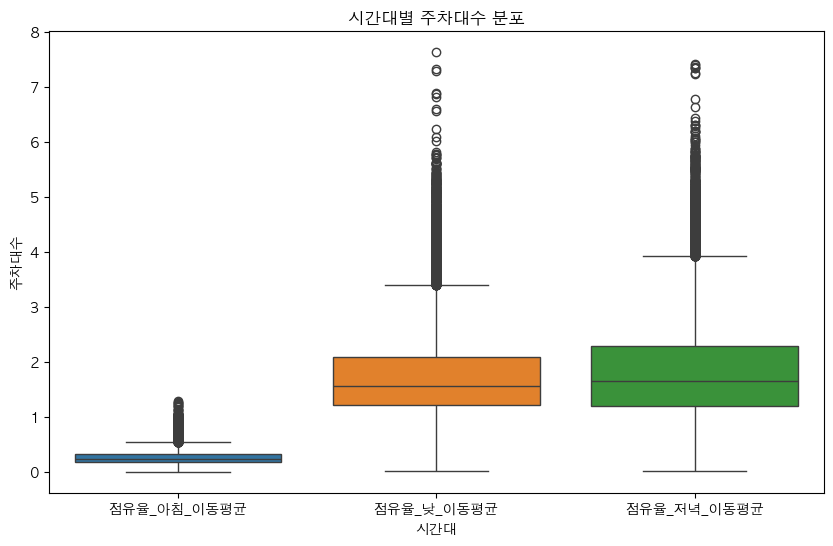

In [29]:
# 시간대별 주차대수 분포
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['점유율_아침_이동평균', '점유율_낮_이동평균', '점유율_저녁_이동평균']])
plt.title('시간대별 주차대수 분포')
plt.xlabel('시간대')
plt.ylabel('주차대수')
plt.show()

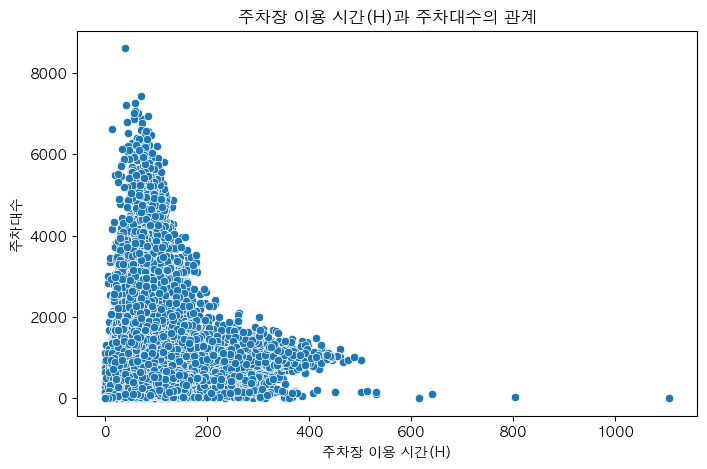

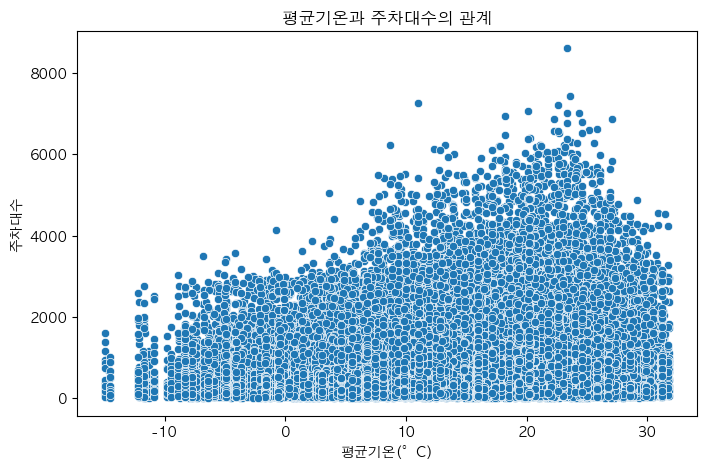

In [30]:
# 평균_주차시간(분)과 주차대수 간의 상관관계
plt.figure(figsize=(8, 5))
sns.scatterplot(x='평균_주차시간(분)', y='주차대수', data=df)
plt.title('주차장 이용 시간(H)과 주차대수의 관계')
plt.xlabel('주차장 이용 시간(H)')
plt.ylabel('주차대수')
plt.show()

# 평균기온과 주차대수의 관계
plt.figure(figsize=(8, 5))
sns.scatterplot(x='평균기온(°C)', y='주차대수', data=df)
plt.title('평균기온과 주차대수의 관계')
plt.xlabel('평균기온(°C)')
plt.ylabel('주차대수')
plt.show()

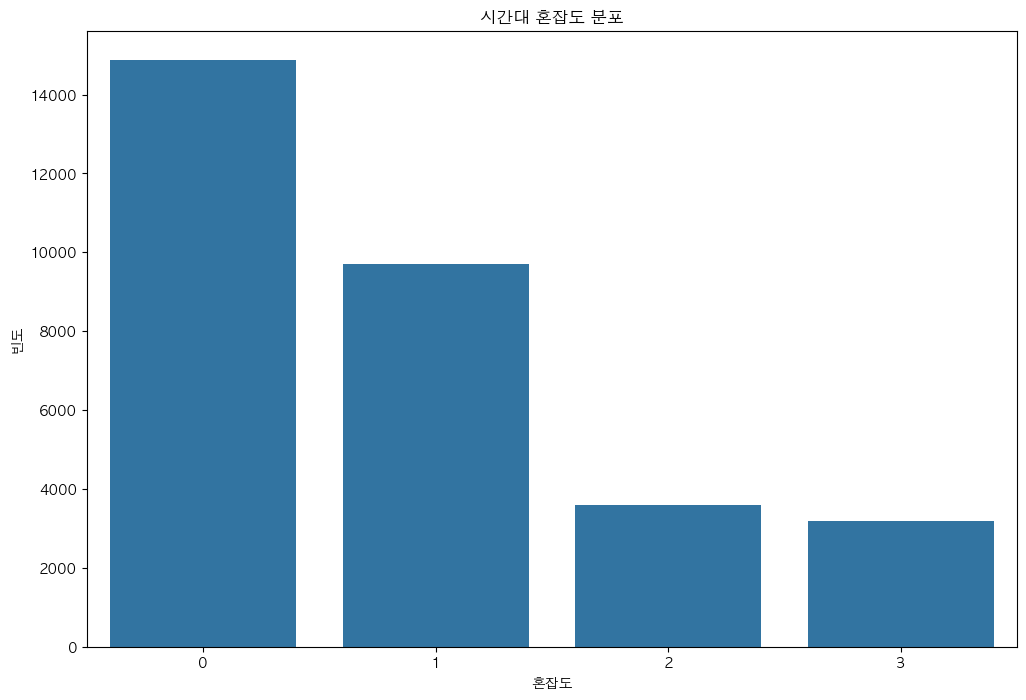

In [31]:
# 시간대별 혼잡도 분포 확인 (데이터프레임에 실 데이터를 채워주세요)
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='혼잡도_군집')
plt.title('시간대 혼잡도 분포')
plt.xlabel('혼잡도')
plt.ylabel('빈도')
plt.show()

혼잡도 분포:
- 여유(0)와 보통(1) 상태가 가장 많으며, 보통과 혼잡은 상대적으로 적은 것을 알 수 있다.
- 특히 여유 상태가 가장 많으므로 주차장의 혼잡도가 대부분 낮음을 알 수 있다.

주차장 상태 편향:
- 여유(0)와 보통(1)에 집중된 경향을 보임

### 일반이용자_일별과 주차대수의 관계 분석

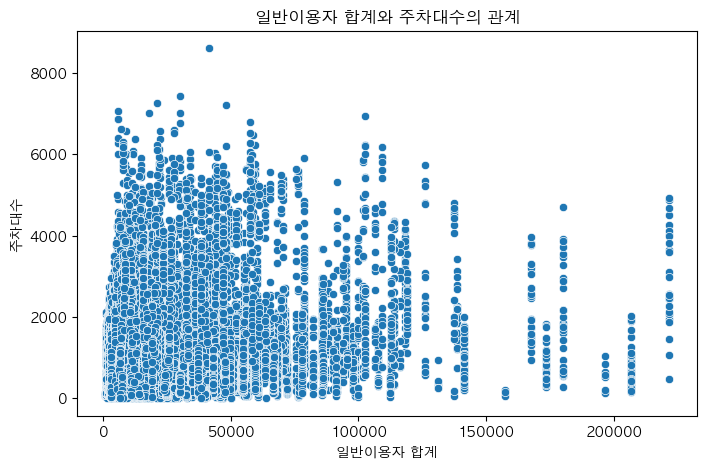

In [36]:
# 일반이용자 합계와 주차대수 간의 상관관계
plt.figure(figsize=(8, 5))
sns.scatterplot(x='일반이용자_합계_일별', y='주차대수', data=df)
plt.title('일반이용자 합계와 주차대수의 관계')
plt.xlabel('일반이용자 합계')
plt.ylabel('주차대수')
plt.show()

### 지구별 주차대수 관계 분석

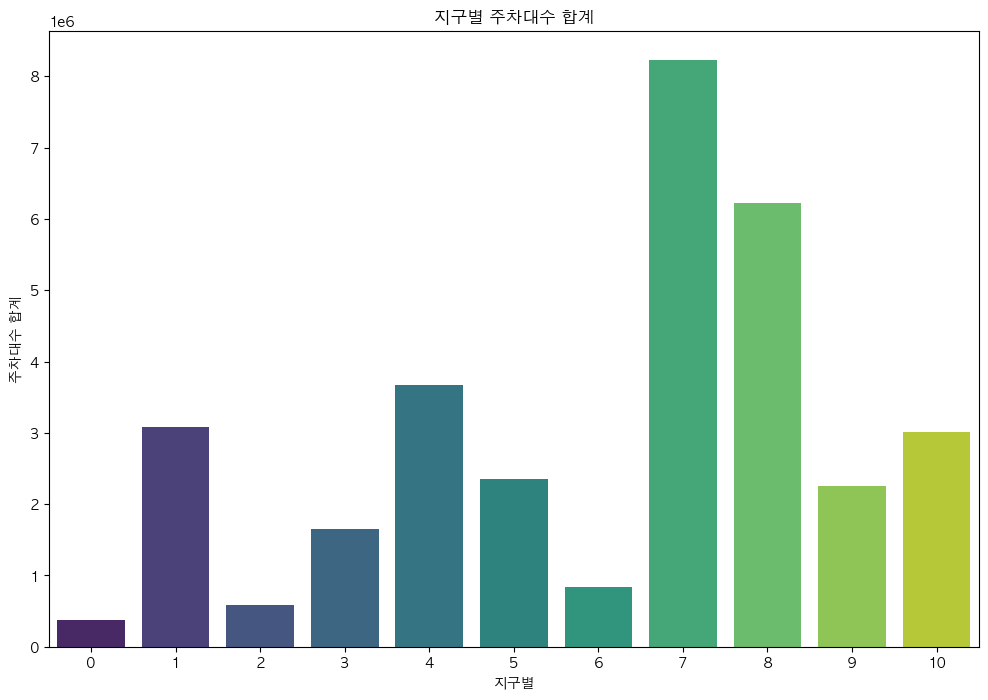

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


# 지구별 주차대수 합계
plt.figure(figsize=(12, 8))
geo_sum = df.groupby('지구별')['주차대수'].sum().reset_index()
sns.barplot(data=geo_sum, x='지구별', y='주차대수', palette='viridis')
plt.title('지구별 주차대수 합계')
plt.xlabel('지구별')
plt.ylabel('주차대수 합계')
plt.show()


> 지구별로 주차대수 합계를 보았을 때 여의도가 가장 많은 주차대수 합계를 나타내는 것을 알 수 있다.

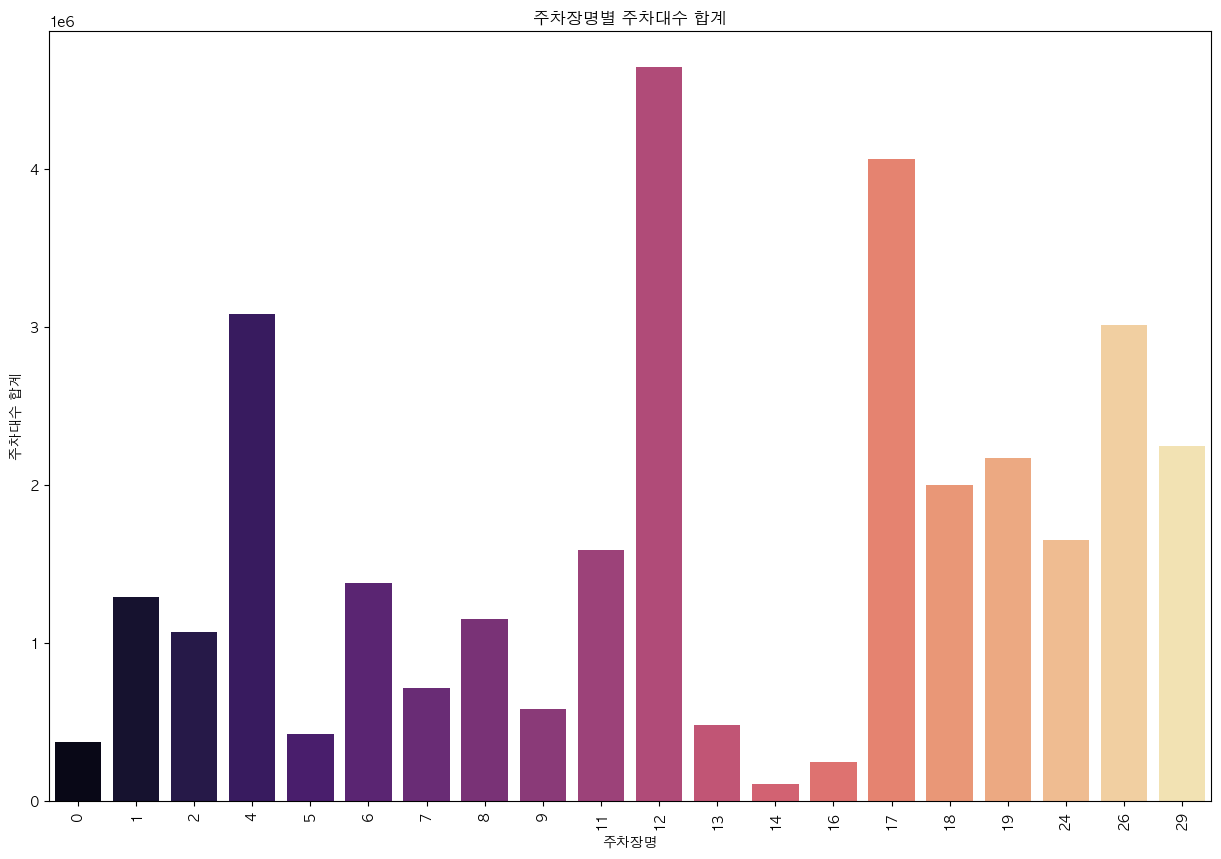

In [38]:
# 주차장명별 주차대수 합계
plt.figure(figsize=(15, 10))
parking_sum = df.groupby('주차장명')['주차대수'].sum().reset_index()
sns.barplot(data=parking_sum, x='주차장명', y='주차대수', palette='magma')
plt.title('주차장명별 주차대수 합계')
plt.xlabel('주차장명')
plt.ylabel('주차대수 합계')
plt.xticks(rotation=90)
plt.show()

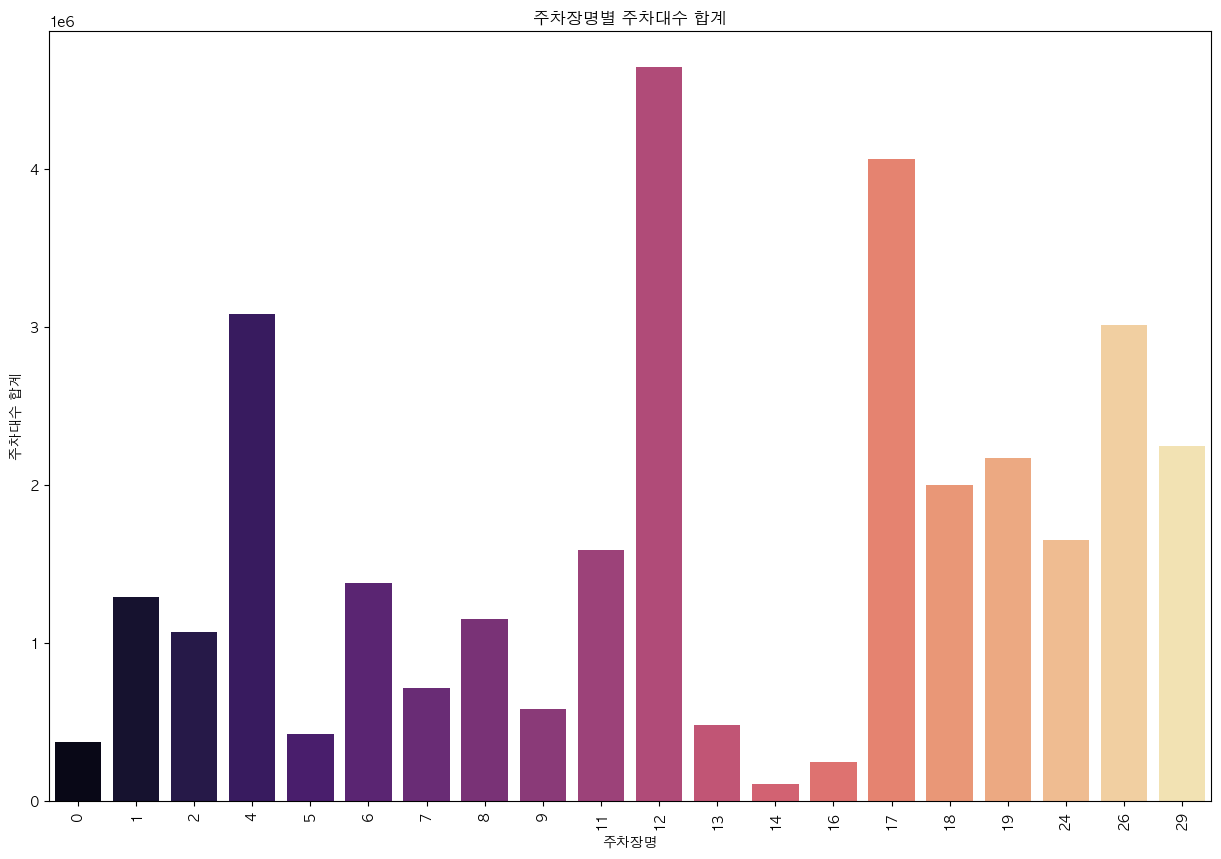

In [39]:
# 주차장명별 주차대수 합계
plt.figure(figsize=(15, 10))
parking_sum = df.groupby('주차장명')['주차대수'].sum().reset_index()
sns.barplot(data=parking_sum, x='주차장명', y='주차대수', palette='magma')
plt.title('주차장명별 주차대수 합계')
plt.xlabel('주차장명')
plt.ylabel('주차대수 합계')
plt.xticks(rotation=90)
plt.show()

> 주차장명별로 주차대수를 보았을때는 반포2,3 주차장이 가장 많은것으로 파악된다.

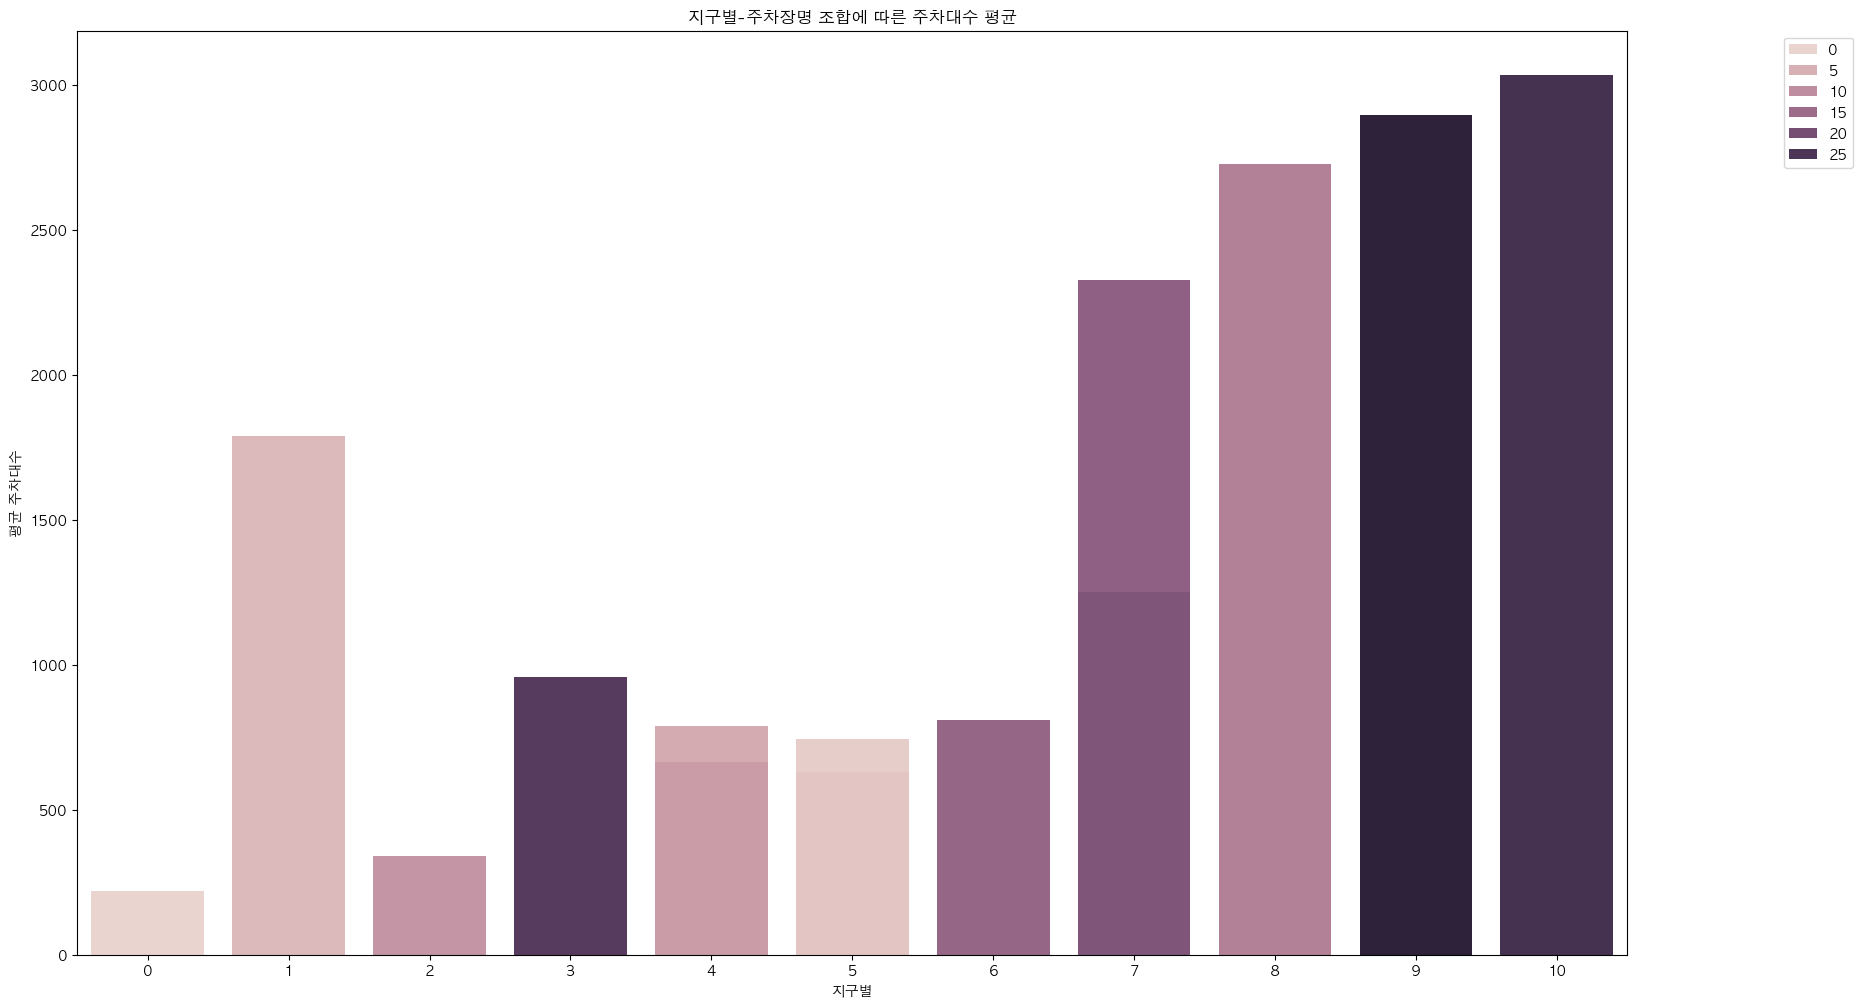

In [40]:
# 지구별-주차장명 조합에 따른 주차대수 평균
plt.figure(figsize=(20, 12))
geo_parking_mean = df.groupby(['지구별', '주차장명'])['주차대수'].mean().reset_index()
sns.barplot(data=geo_parking_mean, x='지구별', y='주차대수', hue='주차장명', dodge=False)
plt.title('지구별-주차장명 조합에 따른 주차대수 평균')
plt.xlabel('지구별')
plt.ylabel('평균 주차대수')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

> 주차장이 많은 지구가 평균 주차대수가 높게 나타내는 경향이 있습니다.   
이로 인해 넓은 주차 공간을 가진 지구가 더 많은 방문객을 유치할 가능성이 있음을 알 수 있다.